# Загрузка Pandas и очистка данных

In [9]:
from datetime import datetime
import numpy as np
import re
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [10]:
df = pd.read_csv("main_task_new.csv")

Первоначальная версия датасета состоит из десяти столбцов, содержащих следующую информацию:

+ Restaurant_id — идентификационный номер ресторана / сети ресторанов;
+ City — город, в котором находится ресторан;
+ Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
+ Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;
+ Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
+ Price Range — диапазон цен в ресторане;
+ Number of Reviews — количество отзывов о ресторане;
+ Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
+ URL_TA — URL страницы ресторана на TripAdvisor;
+ ID_TA — идентификатор ресторана в базе данных TripAdvisor.

In [11]:
df.head(6)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
5,id_1418,Oporto,NaN,1419.0,3.0,NaN,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [13]:
df.rename(columns = {'Number of Reviews':'Number_of_Reviews'}, inplace = True)
df.rename(columns = {'Cuisine Style':'Cuisine_Style'}, inplace = True)
df.rename(columns = {'Price Range':'Price_Range'}, inplace = True)

count    37457.000000
mean       124.825480
std        295.666352
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number_of_Reviews, dtype: float64

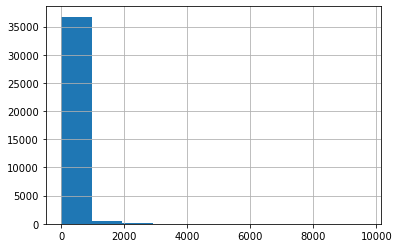

In [14]:
df.Number_of_Reviews.hist()
df.Number_of_Reviews.describe()

In [15]:
df.loc[df['Number_of_Reviews'] > 2000, 'Number_of_Reviews'] = 2000 #Больше 2000 отзывов считаем отклонением и приравниваем к 2000

In [16]:
df['Number_of_Reviews'] = df.Number_of_Reviews.fillna(0) #считаем пустые значения-0 отзывов

In [17]:
df.Price_Range.value_counts() #Считаем кол-во цен

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price_Range, dtype: int64

In [20]:
#df.groupby(['City'])['price'].value_counts() #не смогла додуматься как отфильтровать и вставить максимально значение по городам

City       price
Amsterdam  2        644
           1        163
           3         31
Athens     2        275
           1        137
                   ... 
Warsaw     1        111
           3         28
Zurich     2        293
           1         47
           3         34
Name: price, Length: 93, dtype: int64

In [23]:
df['Price_Range'] = df['Price_Range'].apply(
    lambda x: df['Price_Range'].mode()[0] if pd.isna(x) == True else x) #Вставили моду в пустые значения

In [24]:
df['price'] = df['Price_Range'].replace({'$$ - $$$':'2','$':'1','$$$$':'3'})# Заменяем $ значения на числовые категории

In [22]:
len(df.City.value_counts()) #Считаем кол-во городав в df

31

Добавляем столбцы с общедоступными данными по городам (Население, кол-во ресторанов в городе)

In [25]:
df['population'] = df['City'].replace({'London':'8908081','Paris':'2148327','Stockholm':'961609','Berlin':'3644826 ','Munich':'1471508',
                                       'Oporto':'287591','Milan':'1366180','Bratislava':'437725','Vienna':'1911191','Rome':'2870500'
                                      ,'Barcelona':'1664182','Madrid':'3334730','Dublin':'1173179','Brussels':'185103','Zurich':'434008',
                                       'Warsaw':'1790658','Budapest':'1752286','Copenhagen':'794128','Amsterdam':'860124','Lyon':'518635'
                                      ,'Hamburg':'1845229','Lisbon':'506654','Prague':'1335084','Oslo':'693494'
                                      ,'Helsinki':'655281','Edinburgh':'488050','Geneva':'201818','Ljubljana':'286745','Athens':'664046'
                                      ,'Luxembourg':'633622','Krakow':'779115'})

In [26]:
df['count_restrant_city'] = df['City'].replace({'London':'17199','Paris':'15606','Stockholm':'2781','Berlin':'5738','Munich':'2870',
                                       'Oporto':'1845','Milan':'6737','Bratislava':'1045','Vienna':'3794','Rome':'10340'
                                      ,'Barcelona':'8709','Madrid':'10325','Dublin':'2105','Brussels':'2369','Zurich':'1671',
                                       'Warsaw':'2776','Budapest':'2786','Copenhagen':'1989','Amsterdam':'3664','Lyon':'2570'
                                      ,'Hamburg':'2879','Lisbon':'4561','Prague':'4649','Oslo':'1186'
                                      ,'Helsinki':'1381','Edinburgh':'1763','Geneva':'1345','Ljubljana':'539','Athens':'2352'
                                      ,'Luxembourg':'662','Krakow':'1527'})

In [27]:
rest_count = df.Restaurant_id.value_counts() 
rest_count[rest_count>2] #создаём список сетевых ресторанов

id_436     18
id_633     18
id_871     18
id_227     18
id_430     17
           ..
id_8306     3
id_4752     3
id_2047     3
id_7517     3
id_4890     3
Name: Restaurant_id, Length: 4887, dtype: int64

In [28]:
from collections import Counter
def replace_cuisine(x):
    if pd.isna(x):
        return x # NaN остается как есть, на nan не меняем
    else:
        replace_list = ['[',']',"'"]
        for value in replace_list:
            x = x.replace(value,'')
        return x.replace(', ',',')

# чистим значения в столбце
df['Cuisine_Style'] = df['Cuisine_Style'].apply(replace_cuisine)
# Считаем частоту каждой из кухонь
max_count_cusine = Counter(df['Cuisine_Style'].str.cat(sep=',').split(','))
# Сортируем полученный словарь по убыванию и берем первую кухню
max_cuisine_list = list(max_count_cusine.items())
max_cuisine_list.sort(key=lambda i: i[1],reverse=True)
max_cuisine_list = list(dict(max_cuisine_list[:1]).keys())
max_cuisine_list =  ','.join(max_cuisine_list)
# меняем NaN на самую популярную кухню
df['Cuisine_Style'] = df['Cuisine_Style'].apply(lambda x: max_cuisine_list if pd.isna(x) else x)
df['Cuisine_Style']

0                            European,French,International
1                                      Vegetarian Friendly
2        Japanese,Sushi,Asian,Grill,Vegetarian Friendly...
3                                      Vegetarian Friendly
4              German,Central European,Vegetarian Friendly
                               ...                        
39995    Italian,Vegetarian Friendly,Vegan Options,Glut...
39996     French,American,Bar,European,Vegetarian Friendly
39997                                       Japanese,Sushi
39998    Polish,European,Eastern European,Central Europ...
39999                                              Spanish
Name: Cuisine_Style, Length: 40000, dtype: object

Вместо пропущенных значений втавили самый часто встечаемый тип кухни

In [29]:
max_cuisine_list

'Vegetarian Friendly'

In [30]:
round(df['Cuisine_Style'].apply(lambda x: len(x)).mean(),1)

29.3

In [31]:
df['Cuisine_Style_list'] = df['Cuisine_Style'].apply(lambda x:x.split(','))
df_expl = df.explode('Cuisine_Style_list')

In [34]:
df_expl.Cuisine_Style_list #Список кухонь

0                   European
0                     French
0              International
1        Vegetarian Friendly
2                   Japanese
                ...         
39998               European
39998       Eastern European
39998       Central European
39998    Vegetarian Friendly
39999                Spanish
Name: Cuisine_Style_list, Length: 104896, dtype: object

In [35]:
df.Reviews

0        [['Good food at your doorstep', 'A good hotel ...
1        [['Unique cuisine', 'Delicious Nepalese food']...
2        [['Catch up with friends', 'Not exceptional'],...
3                                                 [[], []]
4        [['Best place to try a Bavarian food', 'Nice b...
                               ...                        
39995    [['The real Italian experience!', 'Wonderful f...
39996    [['Parisian atmosphere', 'Bit pricey but inter...
39997    [['Good by swedish standards', 'A hidden jewel...
39998    [['Underground restaurant', 'Oldest Restaurant...
39999    [['Average', 'Nice an informal'], ['01/31/2016...
Name: Reviews, Length: 40000, dtype: object

In [36]:
pattern=re.compile('\d+[/]\d+[/]\d+')
df["Reviews_date"]=df.Reviews.apply(lambda x:re.findall(pattern,x))
df["Reviews_date"]=df["Reviews_date"].apply(lambda y:[pd.to_datetime(item)for item in y])

In [37]:
df["Reviews_date"].max()

[Timestamp('2018-02-26 00:00:00'), Timestamp('2018-02-26 00:00:00')]

In [38]:
pattern = re.compile('\'\d+\/\d+\/\d+\'')
dates = df['Reviews'].apply(pattern.findall)
# врeменные признаки
df['date1'] = pd.to_datetime(dates.apply(lambda x: x[0] if len(x) > 0 else None))
df['date2'] = pd.to_datetime(dates.apply(lambda x: x[1] if len(x) > 1 else None))

In [39]:
df['date1'][0]

Timestamp('2017-12-31 00:00:00')

In [40]:
df['date2'][0]

Timestamp('2017-11-20 00:00:00')

In [41]:
df['days_publish']=df['date1']-df['date2']

In [42]:
df['days_publish'].max()

Timedelta('3207 days 00:00:00')

In [43]:
df['days_publish']

0         41 days
1        382 days
2          2 days
3             NaT
4        272 days
           ...   
39995     34 days
39996      9 days
39997   3127 days
39998     23 days
39999   1306 days
Name: days_publish, Length: 40000, dtype: timedelta64[ns]

In [44]:
df['days_publish'] = df.days_publish.apply(lambda x: x.days)

In [45]:
df['year1'] = df.date1.apply(lambda x: x.year)

In [46]:
df['year2'] = df.date2.apply(lambda x: x.year)

In [47]:
df['year_max'] = df[['year1','year2']].apply(lambda x: x[0] if x[0]>x[1] else x[1],axis=1)

In [48]:
df['date1'] = df.date1.fillna(0)

In [49]:
df['date2'] = df.date2.fillna(0)

In [50]:
df['days_publish'] = df.days_publish.fillna(0)

In [51]:
df['year_max'] = df.year_max.fillna(0)

In [52]:
df['year1'] = df.year1.fillna(0)

In [53]:
df['year2'] = df.year2.fillna(0)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant_id        40000 non-null  object 
 1   City                 40000 non-null  object 
 2   Cuisine_Style        40000 non-null  object 
 3   Ranking              40000 non-null  float64
 4   Rating               40000 non-null  float64
 5   Price_Range          40000 non-null  object 
 6   Number_of_Reviews    40000 non-null  float64
 7   Reviews              40000 non-null  object 
 8   URL_TA               40000 non-null  object 
 9   ID_TA                40000 non-null  object 
 10  price                40000 non-null  object 
 11  population           40000 non-null  object 
 12  count_restrant_city  40000 non-null  object 
 13  Cuisine_Style_list   40000 non-null  object 
 14  Reviews_date         40000 non-null  object 
 15  date1                40000 non-null 

In [636]:
df = pd.concat([df,pd.get_dummies(df.City)],axis=1)

In [55]:
#df = pd.concat([df,pd.get_dummies(df.Price_Range)],axis=1) #Наименее предпочительный вариант, так как модель показывает значения хуже

In [577]:
#cuisine_list = list(count_cusine.items())
#cuisine_list.sort(key=lambda i: i[1],reverse=True)
#cuisine_list4 = list(dict(cuisine_list[:3]).keys())
#cuisine_list4 =  ','.join(str(x) for x in cuisine_list)

In [585]:
#cuisine_list

[('Vegetarian Friendly', 20472),
 ('European', 10060),
 ('Mediterranean', 6277),
 ('Italian', 5964),
 ('Vegan Options', 4486),
 ('Gluten Free Options', 4113),
 ('Bar', 3297),
 ('French', 3190),
 ('Asian', 3011),
 ('Pizza', 2849),
 ('Spanish', 2798),
 ('Pub', 2449),
 ('Cafe', 2325),
 ('Fast Food', 1705),
 ('British', 1595),
 ('International', 1584),
 ('Seafood', 1505),
 ('Japanese', 1464),
 ('Central European', 1393),
 ('American', 1315),
 ('Sushi', 1156),
 ('Chinese', 1145),
 ('Portuguese', 1107),
 ('Indian', 1041),
 ('Middle Eastern', 782),
 ('Thai', 743),
 ('Wine Bar', 697),
 ('German', 662),
 ('Healthy', 620),
 ('Greek', 604),
 ('Halal', 598),
 ('Czech', 595),
 ('Fusion', 577),
 ('Steakhouse', 573),
 ('Barbecue', 555),
 ('Contemporary', 523),
 ('Vietnamese', 513),
 ('Eastern European', 496),
 ('Soups', 494),
 ('Grill', 490),
 ('Gastropub', 471),
 ('Mexican', 445),
 ('Turkish', 444),
 ('Delicatessen', 392),
 ('Austrian', 380),
 ('South American', 372),
 ('Polish', 365),
 ('Hungarian'

In [594]:
#pd.get_dummies(pd.Series(cu))

,Afghani,African,Albanian,American,Arabic,Argentinean,Armenian,Asian,Australian,Austrian,...,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [56]:
df.drop(['City','Cuisine_Style', 'Price_Range', 'Reviews', 'URL_TA', 'ID_TA', 'Reviews_date', 
         'Number_of_Reviews','date1','date2', 'Cuisine_Style_list', 'Price_Range'],inplace = True, axis = 1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant_id        40000 non-null  object 
 1   Ranking              40000 non-null  float64
 2   Rating               40000 non-null  float64
 3   price                40000 non-null  object 
 4   population           40000 non-null  object 
 5   count_restrant_city  40000 non-null  object 
 6   days_publish         40000 non-null  float64
 7   year1                40000 non-null  float64
 8   year2                40000 non-null  float64
 9   year_max             40000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 3.1+ MB


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [58]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов) 'Restaurant_id',
X = df.drop(['Restaurant_id','Rating'], axis = 1)
y = df['Rating']

In [59]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [60]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [61]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [62]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

In [63]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.29218299999999997
